In [ ]:
#Trabalho Prático - Processamento de Imagens
#Discentes: Helorrayne Cristine de Alcantara Rodrigues e Wanderson Almeida de Mello
#implementação do algoritmo de segmentação de imagens baseado em limiarização, utilizando metodo do vale

In [ ]:
# Instale as dependências necessárias (execute apenas uma vez)
!pip install opencv-python-headless
!pip install matplotlib
%pip install scipy

In [1]:
#importando as bibliotecas necessárias

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

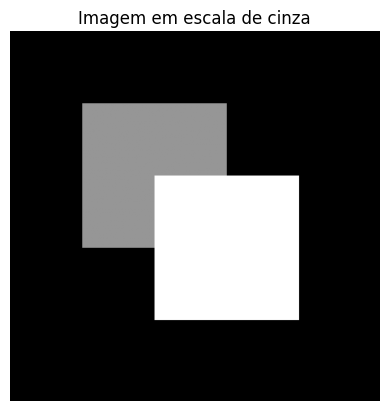

In [2]:
# Passo 1: Carregar a imagem em escala de cinza

# Lê a imagem do disco (substitua 'imagem.jpg' pelo caminho da sua imagem)
imagem = cv2.imread('imagem.png', cv2.IMREAD_GRAYSCALE)

# Verifica se a imagem foi carregada corretamente
if imagem is None:
    print("Erro ao carregar a imagem.")
else:
    # Exibe a imagem carregada
    plt.imshow(imagem, cmap='gray')
    plt.title('Imagem em escala de cinza')
    plt.axis('off')
    plt.show()

In [3]:
# Passo 2: Calcular o histograma dos níveis de cinza da imagem

# Calcula o histograma dos niveis de cinza da imagem, sem aplicar mascaras
hist = cv2.calcHist([imagem], [0], None, [256], [0, 256])



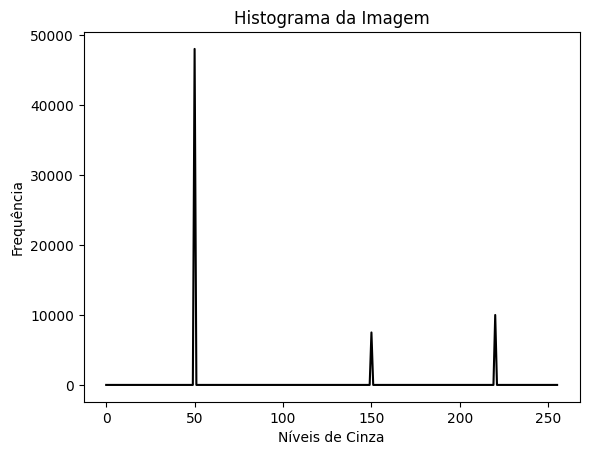

In [4]:
# Exibe o histograma
plt.figure()
plt.plot(hist, color='black')
plt.title('Histograma da Imagem')
plt.xlabel('Níveis de Cinza')
plt.ylabel('Frequência')
plt.show()

In [5]:


# Passo 3: Suavizar o histograma (opcional)

# Suaviza o histograma usando um filtro Gaussiano para facilitar a identificação dos vales

hist_suavizado = gaussian_filter1d(hist.squeeze(), sigma=2)



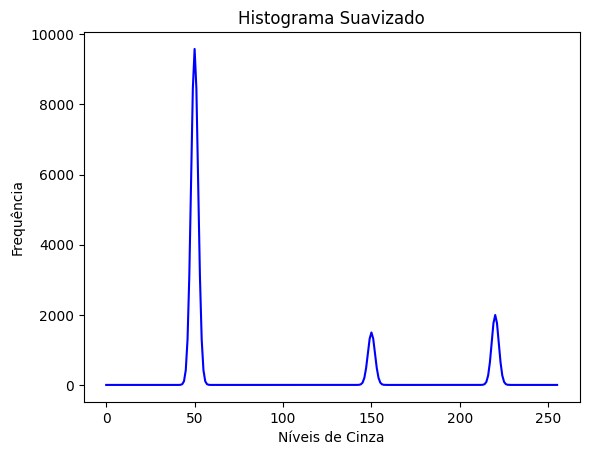

In [6]:
# Exibe o histograma suavizado
plt.figure()
plt.plot(hist_suavizado, color='blue')
plt.title('Histograma Suavizado')
plt.xlabel('Níveis de Cinza')
plt.ylabel('Frequência')
plt.show()

In [7]:

# Passo 4: Encontrar os vales no histograma suavizado para sugerir limiares de segmentação


# Inverter o histograma suavizado para encontrar vales como picos
vales, _ = find_peaks(-hist_suavizado, distance=10, prominence=hist_suavizado.max()*0.01)



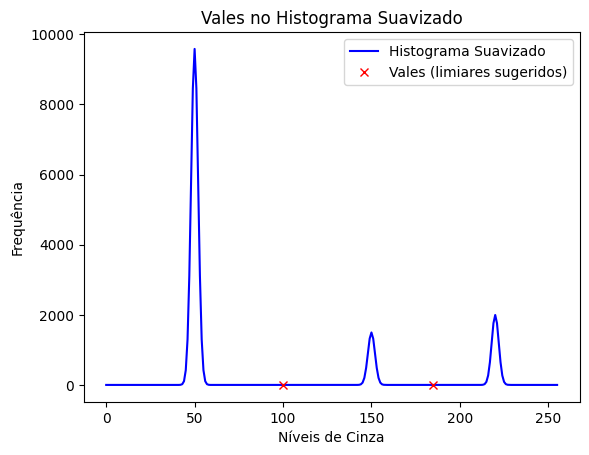

Limiar(es) sugerido(s): [100 185]


In [8]:
# Exibir os vales encontrados no histograma suavizado
plt.figure()
plt.plot(hist_suavizado, color='blue', label='Histograma Suavizado')
plt.plot(vales, hist_suavizado[vales], "rx", label='Vales (limiares sugeridos)')
plt.title('Vales no Histograma Suavizado')
plt.xlabel('Níveis de Cinza')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Exibir os níveis de cinza sugeridos como limiares
print("Limiar(es) sugerido(s):", vales)

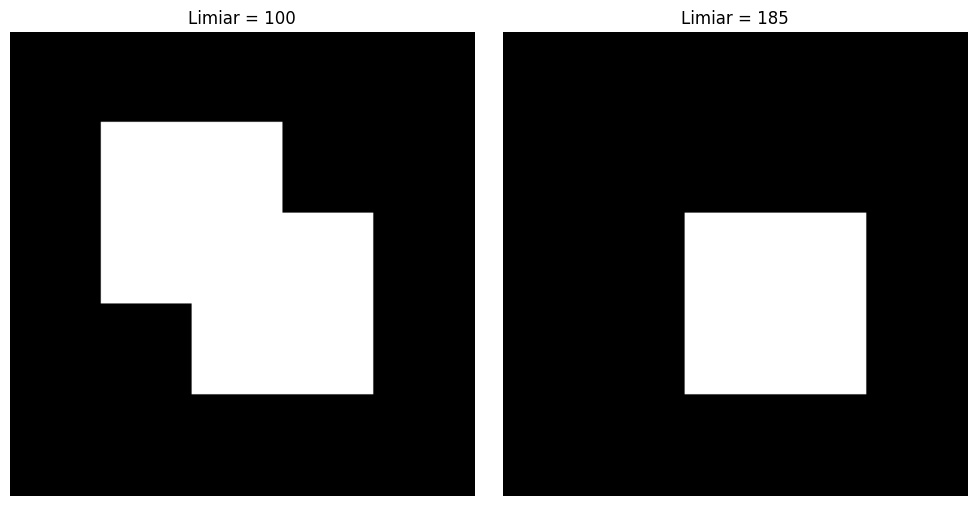

In [9]:
# Exibir todas as imagens segmentadas em uma única figura
if len(vales) > 0:
    fig, axs = plt.subplots(1, len(vales), figsize=(5 * len(vales), 5))
    if len(vales) == 1:
        axs = [axs]
    for ax, limiar in zip(axs, vales):
        imagem_segmentada = (imagem > limiar).astype(np.uint8) * 255
        ax.imshow(imagem_segmentada, cmap='gray')
        ax.set_title(f'Limiar = {limiar}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum limiar sugerido encontrado.")